In [59]:
import MDAnalysis
import numpy as np
from DEERPREdict.DEER import DEERpredict, Operations
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import minimize_scalar, least_squares
from scipy.interpolate import interp1d

Calculate DEER data from PDB structures of HIV-1PR.

In [60]:
for pdb in ['3bvb','2bpx','1hhp','1tw7']:
    u = MDAnalysis.Universe('PDBs/{:s}.pdb'.format(pdb))
    DEER = DEERpredict(u, residues = [55,55], chains=['A', 'B'], log_file = 'log', 
                   temperature = 300, z_cutoff = 0.05)
    DEER.run(output_prefix = 'PDBs/'+pdb)

Reproduce Figure 1 of "DEER-PREdict: Software for Efficient Calculation of Spin-Label EPR and NMR Data from Conformational Ensembles" by Tesei and coworkers.

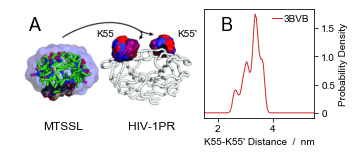

In [61]:
ax1 = plt.subplot2grid(shape=(1,5), loc=(0,0), colspan=3, fig=plt.figure(figsize=(5.2,2)))
ax2 = plt.subplot2grid((1,5), (0,3), colspan=2)

I = plt.imread('mtssl_hiv1-pr.tif')
ax1.imshow(I[:530], interpolation='bilinear')
ax1.axis('off')
bbox_props = dict(boxstyle='square', fc='w', ec='w', lw=4)
ax1.annotate('A',xy=(.08,.8),xycoords='figure fraction',bbox=bbox_props,fontsize=18)
ax2.annotate('B',xy=(.62,.8),xycoords='figure fraction',fontsize=18)
ax2.set_yticks([0,.5,1.,1.5])
ax2.set_yticklabels([0,.5,1.0,1.5])
ax2.set_ylabel('Probability Density')
ax2.set_xlabel("K55-K55' Distance  /  nm")

ax1.annotate("K55",xy=(.27,.76),xycoords='figure fraction',fontsize=10)
ax1.annotate("K55'",xy=(.5,.76),xycoords='figure fraction',fontsize=10)
ax1.annotate("MTSSL",xy=(.12,.16),xycoords='figure fraction',fontsize=12)
ax1.annotate("HIV-1PR",xy=(.36,.16),xycoords='figure fraction',fontsize=12)
x, y = np.loadtxt('PDBs/3bvb-55-55.dat',unpack=True)
y = y/np.trapz(y,x)
ax2.plot(x,y,label='3BVB',color=plt.cm.tab10(3),lw=1,ls='-')
ax2.set_xlim(1.5,5.5)
ax2.legend(frameon=False, handlelength=1,loc='upper right',handletextpad=0.2,borderpad=0)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
#plt.tight_layout(w_pad=2,h_pad=0)

Test DEER-PREdict against reference DEER data.

In [64]:
u = MDAnalysis.Universe('PDBs/HIV-1PR.pdb')

In [65]:
DEER = DEERpredict(u, residues = [55, 55], chains=['A', 'B'], temperature = 298 )
DEER.run(output_prefix = 'res')

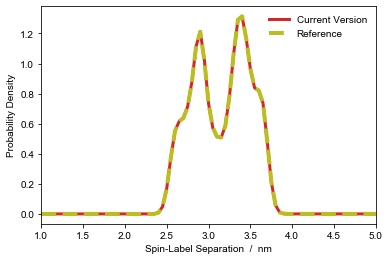

In [66]:
x,y = np.loadtxt('res-55-55.dat',unpack=True)
x_ref,y_ref = np.loadtxt('DEER_HIV-1PR.dat',unpack=True)
plt.plot(x,y,color=plt.cm.tab10(3),lw=3,label=r'Current Version')
plt.plot(x_ref,y_ref/np.trapz(y_ref,x_ref),color=plt.cm.tab10(8),ls='--',label=r'Reference',lw=4)
plt.xlim(1,5)
plt.ylabel('Probability Density')
plt.xlabel('Spin-Label Separation  /  nm')
plt.legend(frameon=False)
plt.savefig('DEER.pdf')

Reproduce Figure S2 of "DEER-PREdict: Software for Efficient Calculation of Spin-Label EPR and NMR Data from Conformational Ensembles" by Tesei and coworkers.

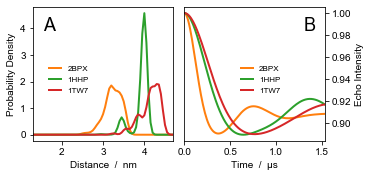

In [67]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(5.2,2.5))

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

for sim,c in zip(['2bpx','1hhp','1tw7'],[1,2,3]):
    x, y = np.loadtxt('PDBs/'+sim+'-55-55.dat',unpack=True)
    y = y/np.trapz(y,x)
    sim = sim.upper()
    fpr = interp1d(x, y, kind='cubic')
    ax1.plot(x,y,ls='-',label=sim,color=plt.cm.tab10(c),lw=2)

ax1.set_xlim(1.3,4.7)
ax1.legend(frameon=False, handlelength=1.5,bbox_to_anchor=(0.45,0.3))
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Distance  /  nm')

a = 0.0922

for sim,c in zip(['2bpx','1hhp','1tw7'],[1,2,3]):
    x, y = np.loadtxt('PDBs/'+sim+'-55-55_time-domain.dat',unpack=True)
    sim = sim.upper()
    V = 1+a*(y-1)
    ax2.plot(x,V,ls='-',label=sim,color=plt.cm.tab10(c),lw=2)

ax2.set_ylabel('Echo Intensity')
ax2.set_xlabel('Time  /  μs')
ax2.legend(frameon=False, handlelength=1.5, bbox_to_anchor=(0.35,0.3))
ax2.set_xlim(0,1.53)
ax1.annotate('A',xy=(.07,.82),xycoords='axes fraction',fontsize=18)
ax2.annotate('B',xy=(.85,.82),xycoords='axes fraction',fontsize=18)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
plt.tight_layout(w_pad=.5)